In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline

In [2]:
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df = housing.loc[:, ['area', 'price']]
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [5]:
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df)
df.columns = df_columns
df.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


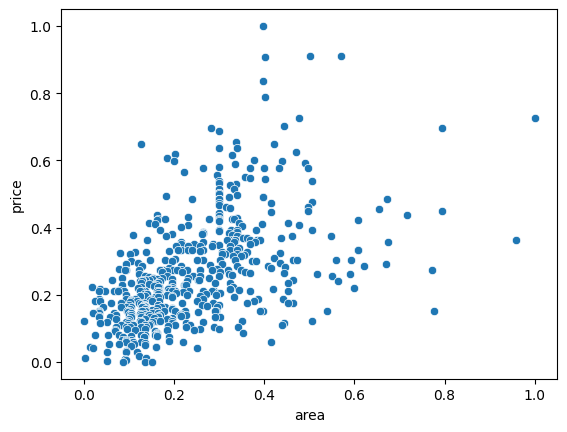

In [6]:
sns.scatterplot(data=df, x='area', y='price')
plt.show()

In [7]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(len(df_train))
print(len(df_test))

381
164


In [22]:
X_train = df_train['area']
X_train = X_train.values.reshape(-1,1)
y_train = df_train['price']

X_test = df_test['area']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['price']

# Polynomial Regression
* Simple linear regression $y = \beta_0 + \beta_1 x_1$
* Polynomial regression of degree n, we fit a curve of the form: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 ... \beta_n x_1^n$

In [ ]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

PolynomialFeatures(degree=5)